https://www.kaggle.com/datasets/yekenot/tree-survival-prediction

In [6]:
#  Imports
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [7]:
df = pd.read_csv('Tree_Data.csv')

basic data understanding

In [8]:
df.shape

(2783, 24)

In [9]:
df.head(10)

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,Conspecific,Myco,SoilMyco,PlantDate,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,Heterospecific,AMF,AMF,6/11/18,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,NaN
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,Heterospecific,EMF,EMF,5/25/18,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,Heterospecific,EMF,AMF,5/31/18,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,NaN
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,Heterospecific,AMF,AMF,6/11/18,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,Heterospecific,AMF,AMF,6/11/18,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,NaN,NaN
5,18,1,C,Prunus serotina,0.106,Med,2016,Acer rubrum,1332,Non-Sterile,Heterospecific,AMF,AMF,6/5/18,35.29,NaN,0.30,10.80,13.79,7,24.5,1.0,NaN,NaN
6,25,1,A,Quercus alba,0.108,Med,2016,Populus grandidentata,891,Non-Sterile,Heterospecific,EMF,EMF,5/25/18,24.00,20.00,5.11,18.82,22.51,7,24.5,0.0,X,NaN
7,40,1,A,Quercus rubra,0.108,Med,2017,Sterile,1595,Sterile,Sterilized,EMF,Sterile,5/23/18,4.00,0.00,3.43,25.22,14.81,7,24.5,0.0,X,NaN
8,26,1,A,Quercus rubra,0.108,Med,2016,Acer saccharum,1323,Non-Sterile,Heterospecific,EMF,AMF,5/29/18,28.74,36.18,3.83,26.65,14.65,33,115.5,0.0,NaN,X
9,41,1,A,Acer saccharum,0.108,Med,2016,Populus grandidentata,394,Non-Sterile,Heterospecific,AMF,EMF,6/4/18,14.16,NaN,-0.05,13.30,12.16,7,24.5,1.0,NaN,NaN


In [10]:
df.columns

Index(['No', 'Plot', 'Subplot', 'Species', 'Light_ISF', 'Light_Cat', 'Core',
       'Soil', 'Adult', 'Sterile', 'Conspecific', 'Myco', 'SoilMyco',
       'PlantDate', 'AMF', 'EMF', 'Phenolics', 'Lignin', 'NSC', 'Census',
       'Time', 'Event', 'Harvest', 'Alive'],
      dtype='object')

In [11]:
df.dtypes

No               int64
Plot             int64
Subplot         object
Species         object
Light_ISF      float64
Light_Cat       object
Core             int64
Soil            object
Adult           object
Sterile         object
Conspecific     object
Myco            object
SoilMyco        object
PlantDate       object
AMF            float64
EMF            float64
Phenolics      float64
Lignin         float64
NSC            float64
Census           int64
Time           float64
Event          float64
Harvest         object
Alive           object
dtype: object

In [12]:
df.describe()

,No,Plot,Light_ISF,Core,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event
count,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,1283.00000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2782.000000
mean,3914.513834,9.561624,0.085707,2016.648940,20.553069,26.47675,1.933105,15.759792,14.219641,15.282070,53.487244,0.570453
std,2253.515063,5.203659,0.025638,0.477387,12.309587,16.63689,1.969842,6.779607,4.298271,9.166555,32.082942,0.495100
min,3.000000,1.000000,0.032000,2016.000000,0.000000,0.00000,-1.350000,2.230000,4.300000,4.000000,14.000000,0.000000
25%,1971.000000,5.000000,0.066000,2016.000000,13.400000,13.78000,0.170000,10.355000,11.605000,7.000000,24.500000,0.000000
50%,3932.000000,10.000000,0.082000,2017.000000,18.000000,27.72000,0.750000,14.040000,12.660000,13.000000,45.500000,1.000000
75%,5879.000000,14.000000,0.100000,2017.000000,24.445000,35.71000,3.780000,21.115000,17.275000,18.000000,63.000000,1.000000
max,7772.000000,18.000000,0.161000,2017.000000,100.000000,87.50000,6.100000,32.770000,29.450000,33.000000,115.500000,1.000000


## Data preparation

In [13]:
df.head(5)

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,Conspecific,Myco,SoilMyco,PlantDate,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,Heterospecific,AMF,AMF,6/11/18,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,NaN
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,Heterospecific,EMF,EMF,5/25/18,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,Heterospecific,EMF,AMF,5/31/18,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,NaN
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,Heterospecific,AMF,AMF,6/11/18,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,Heterospecific,AMF,AMF,6/11/18,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,NaN,NaN


## Columns description
* No: Seedling unique ID number

* Plot: Number of the field plot the seedling was planted in (1-18)

* Subplot: Subplot within the main plot the seedling was planted in. Broken into 5 subplots (1 per corner, plus 1 in the middle) (A-E)

* Species: Includes Acer saccharum, Prunus serotina, Quercus alba, and Quercus rubra.

* Light ISF: Light level quantified with HemiView software. Represents the amount of light reaching each subplot at a height of 1m

* Light Cat: Categorical light level created by splitting the range of Light_ISF values into three bins (low, med, high)

* Core: Year the soil core was removed from the field

* Soil: Species from which the soil core was taken. Includes all species, plus Acer rubrum, Populus grandidentata, and a sterilized conspecific for each species

* Adult: Individual tree that soil was taken from. Up to 6 adults per species. Used as a random effect in analyses

* Sterile: Whether the soil was sterilized or not

* Conspecific: Whether the soil was conspecific, heterospecific, or sterilized conspecific

* Myco: Mycorrhizal type of the seedling species (AMF or EMF)

* SoilMyco: Mycorrhizal type of the species culturing the soil (AMF or EMF)

* PlantDate: The date that seedlings were planted in the field pots

* AMF: Percent arbuscular mycorrhizal fungi colonization on the fine roots of harvested seedlings

* EMF: Percent ectomycorrhizal fungi colonization on the root tips of harvested seedlings

* Phenolics: Calculated as nmol Gallic acid equivalents per mg dry extract (see manuscript for detailed methods)

* NSC: Calculated as percent dry mass nonstructural carbohydrates (see manuscript for detailed methods)

* Lignin: Calculated as percent dry mass lignin (see manuscript for detailed methods)

* Census: The census number at which time the seedling died or was harvested

* Time: The number of days at which time the seedling died or was harvested

* Event: Used for survival analysis to indicate status of each individual seedling at a given time (above)
0 = harvested or experiment ended
1 = dead

* Harvest: Indicates whether the seedling was harvested for trait measurement.
* Alive: Indicates if the seedling was alive at the end of the second growing season. "X" in this field indicates alive status.

In [14]:
columns_to_keep = ['Plot', 'Subplot', 'Species', 'Light_Cat', 'Core',
       'Soil', 'Adult', 'Sterile', 'Conspecific', 'Myco', 'SoilMyco',
       'AMF', 'EMF', 'Phenolics', 'Lignin', 'NSC', 'Alive']

df = df[columns_to_keep].copy()

In [15]:
df.head(5)

,Plot,Subplot,Species,Light_Cat,Core,Soil,Adult,Sterile,Conspecific,Myco,SoilMyco,AMF,EMF,Phenolics,Lignin,NSC,Alive
0,1,C,Acer saccharum,Med,2017,Prunus serotina,I,Non-Sterile,Heterospecific,AMF,AMF,22.00,NaN,-0.56,13.86,12.15,NaN
1,1,C,Quercus alba,Med,2017,Quercus rubra,970,Non-Sterile,Heterospecific,EMF,EMF,15.82,31.07,5.19,20.52,19.29,X
2,1,C,Quercus rubra,Med,2017,Prunus serotina,J,Non-Sterile,Heterospecific,EMF,AMF,24.45,28.19,3.36,24.74,15.01,NaN
3,7,D,Acer saccharum,Med,2016,Prunus serotina,J,Non-Sterile,Heterospecific,AMF,AMF,22.23,NaN,-0.71,14.29,12.36,NaN
4,14,A,Acer saccharum,Low,2017,Prunus serotina,689,Non-Sterile,Heterospecific,AMF,AMF,21.15,NaN,-0.58,10.85,11.20,NaN


In [16]:
df.shape

(2783, 17)

In [17]:
df.isna().sum()

Plot              0
Subplot           0
Species           0
Light_Cat         0
Core              0
Soil              0
Adult             0
Sterile           0
Conspecific       0
Myco              0
SoilMyco          0
AMF               0
EMF            1500
Phenolics         0
Lignin            0
NSC               0
Alive          2292
dtype: int64

In [18]:
df.drop('EMF', axis=1, inplace = True)

In [19]:
df.loc[df.duplicated()]

,Plot,Subplot,Species,Light_Cat,Core,Soil,Adult,Sterile,Conspecific,Myco,SoilMyco,AMF,Phenolics,Lignin,NSC,Alive


# Features understanding

## Plot

In [20]:
df['Plot'].dtype

# possible problem - number is just a label of the field -> order doesn't really matter

dtype('int64')

Text(0, 0.5, 'Number of samples')

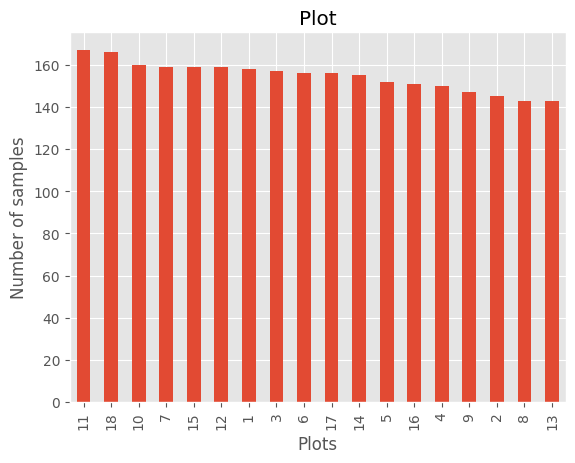

In [21]:
ax = df['Plot'].value_counts().plot(kind='bar', title='Plot')
ax.set_xlabel('Plots')
ax.set_ylabel('Number of samples')

# samples are pretty equaly distributed on all of the plots

## Subplot

In [22]:
df['Subplot'].dtype

# 5 categories -> ONE HOT ENCODING

dtype('O')

Text(0, 0.5, 'Number of samples')

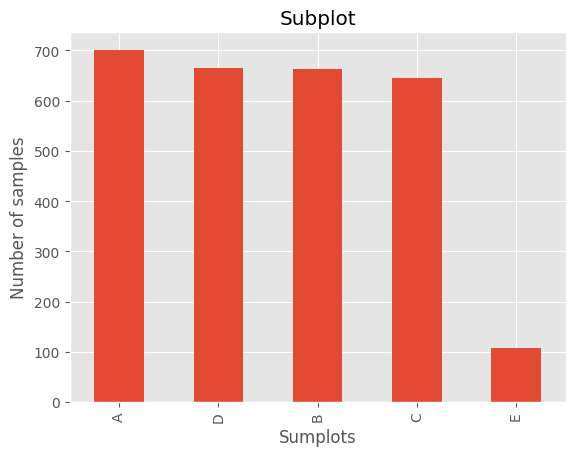

In [23]:
ax = df['Subplot'].value_counts().plot(kind='bar', title='Subplot')
ax.set_xlabel('Sumplots')
ax.set_ylabel('Number of samples')

# There are much less samples in the E subplot, the rest are mostly equaly distributed

## Species

In [24]:
df['Species'].dtype

dtype('O')

Text(0, 0.5, 'Number of samples')

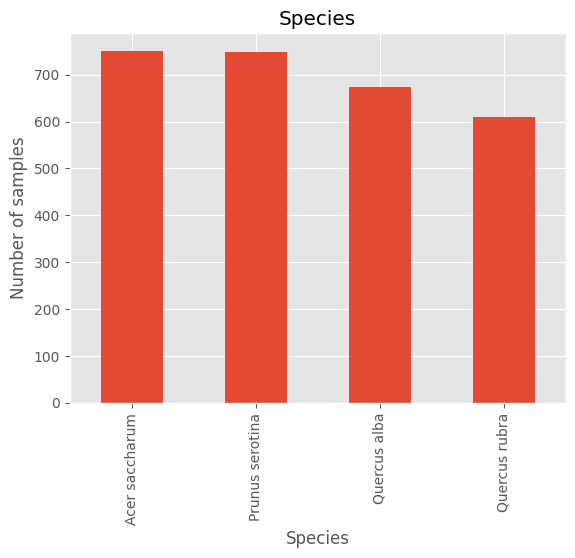

In [25]:
ax = df['Species'].value_counts().plot(kind='bar', title='Species')
ax.set_xlabel('Species')
ax.set_ylabel('Number of samples')

# more or less equaly distributed

## Light Cat

In [26]:
df['Light_Cat'].dtype

dtype('O')

Text(0, 0.5, 'Number of samples')

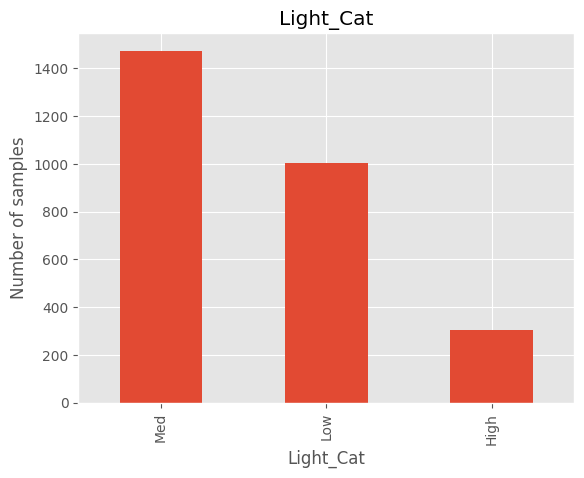

In [27]:
ax = df['Light_Cat'].value_counts().plot(kind='bar', title='Light_Cat')
ax.set_xlabel('Light_Cat')
ax.set_ylabel('Number of samples')

## Core

In [28]:
df['Core'].dtype

dtype('int64')

Text(0, 0.5, 'Number of samples')

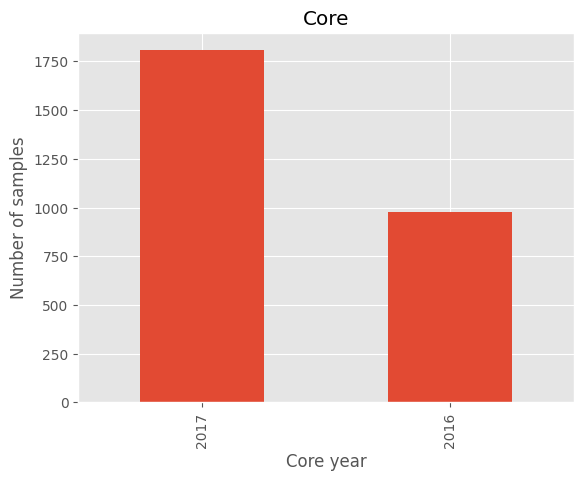

In [29]:
ax = df['Core'].value_counts().plot(kind='bar', title='Core')
ax.set_xlabel('Core year')
ax.set_ylabel('Number of samples')

## Soil

In [30]:
df['Soil'].dtype

dtype('O')

Text(0, 0.5, 'Number of samples')

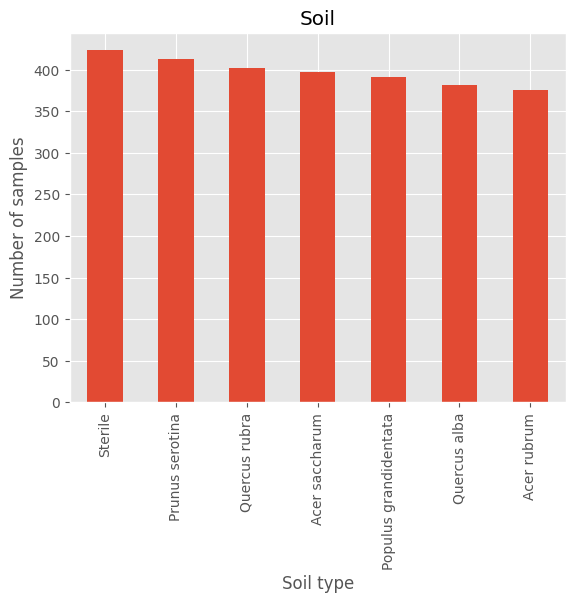

In [31]:
ax = df['Soil'].value_counts().plot(kind='bar', title='Soil')
ax.set_xlabel('Soil type')
ax.set_ylabel('Number of samples')

## Adult

Text(0, 0.5, 'Number of samples')

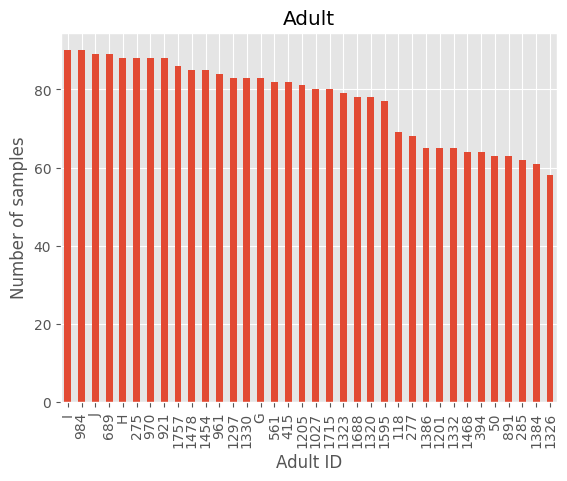

In [32]:
ax = df['Adult'].value_counts().plot(kind='bar', title='Adult')
ax.set_xlabel('Adult ID')
ax.set_ylabel('Number of samples')

In [33]:
# Will it be better to keep Adult column as it is and only change I, J, H, G values to numerical, or to encode it

## Sterile

Text(0, 0.5, 'Number of samples')

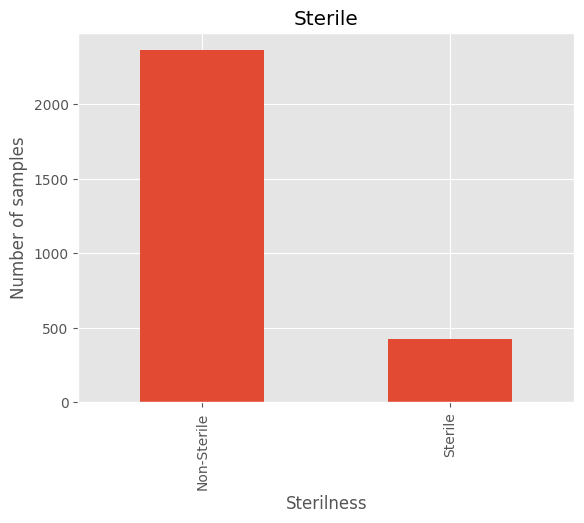

In [34]:
ax = df['Sterile'].value_counts().plot(kind='bar', title='Sterile')
ax.set_xlabel('Sterilness')
ax.set_ylabel('Number of samples')

## Conspecific

Text(0, 0.5, 'Number of samples')

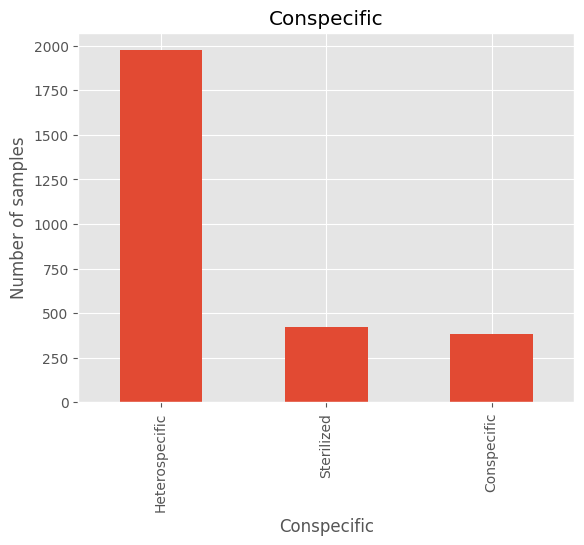

In [35]:
ax = df['Conspecific'].value_counts().plot(kind='bar', title='Conspecific')
ax.set_xlabel('Conspecific')
ax.set_ylabel('Number of samples')

## Myco

Text(0, 0.5, 'Number of samples')

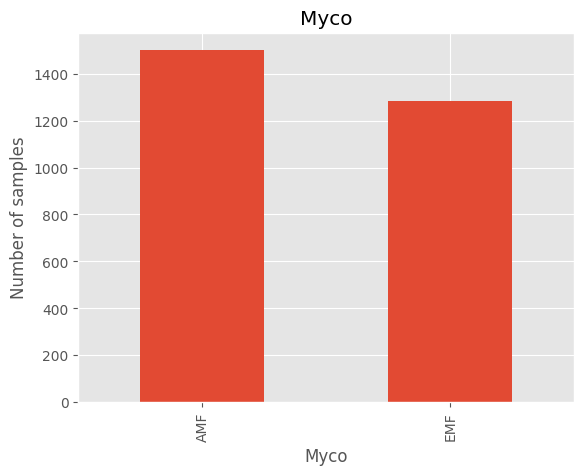

In [36]:
ax = df['Myco'].value_counts().plot(kind='bar', title='Myco')
ax.set_xlabel('Myco')
ax.set_ylabel('Number of samples')

## SoilMyco

Text(0, 0.5, 'Number of samples')

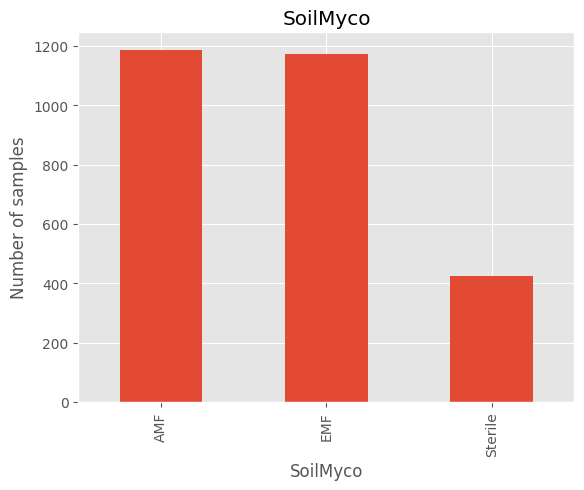

In [37]:
ax = df['SoilMyco'].value_counts().plot(kind='bar', title='SoilMyco')
ax.set_xlabel('SoilMyco')
ax.set_ylabel('Number of samples')

## AMF

In [38]:
df['AMF'].dtype

dtype('float64')

In [39]:
df['AMF'].value_counts()

0.00     48
12.00    36
17.00    34
15.00    34
14.00    29
         ..
26.88     1
26.67     1
27.52     1
27.59     1
16.99     1
Name: AMF, Length: 924, dtype: int64

Text(0.5, 0, 'AMF')

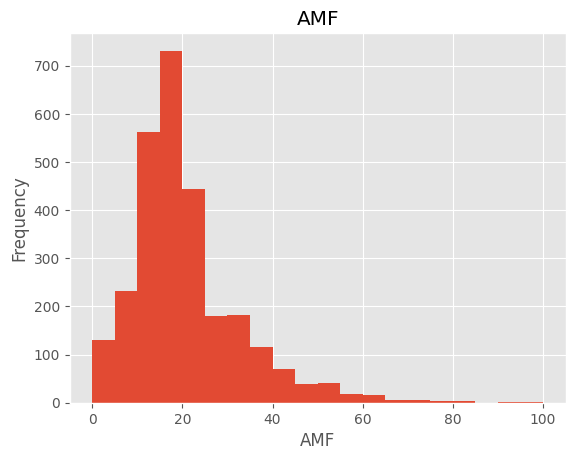

In [40]:
ax = df['AMF'].plot(kind='hist', bins=20, title='AMF')
ax.set_xlabel('AMF')

Text(0.5, 0, 'AMF')

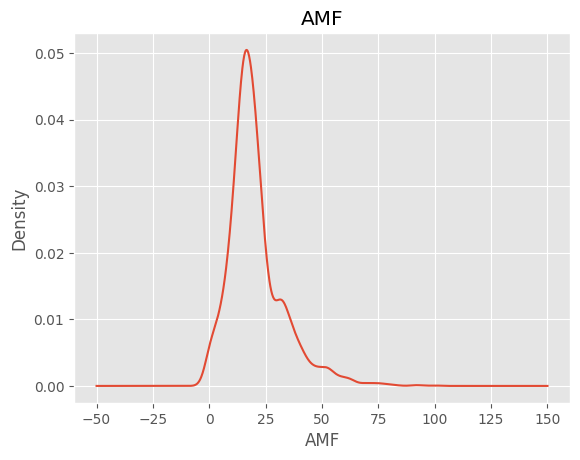

In [41]:
ax = df['AMF'].plot(kind='kde', title='AMF')
ax.set_xlabel('AMF')

In [42]:
df['AMF'].describe()

count    2783.000000
mean       20.553069
std        12.309587
min         0.000000
25%        13.400000
50%        18.000000
75%        24.445000
max       100.000000
Name: AMF, dtype: float64

## Phenolics

In [43]:
df['Phenolics'].value_counts()

-0.03    40
-0.04    37
-0.09    33
 0.71    28
 0.67    27
         ..
 5.15     1
 0.99     1
 5.60     1
 5.48     1
 5.51     1
Name: Phenolics, Length: 494, dtype: int64

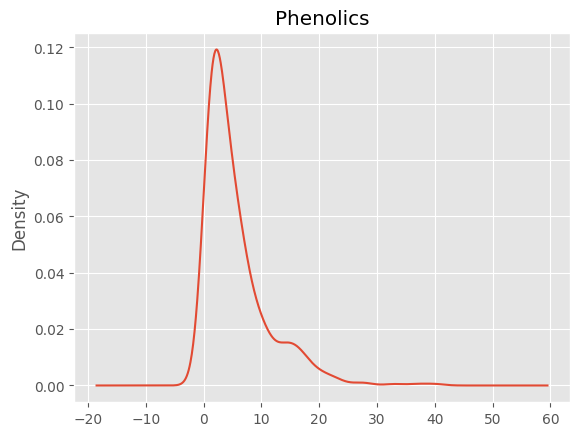

In [44]:
ax = df['Phenolics'].value_counts().plot(kind='kde', title='Phenolics')

In [45]:
df['Phenolics'].describe()

count    2783.000000
mean        1.933105
std         1.969842
min        -1.350000
25%         0.170000
50%         0.750000
75%         3.780000
max         6.100000
Name: Phenolics, dtype: float64

## Lignin

In [46]:
df['Lignin'].value_counts()

13.73    19
13.88    18
10.49    13
13.55    12
18.95    12
         ..
17.60     1
23.93     1
3.86      1
27.47     1
19.38     1
Name: Lignin, Length: 1095, dtype: int64

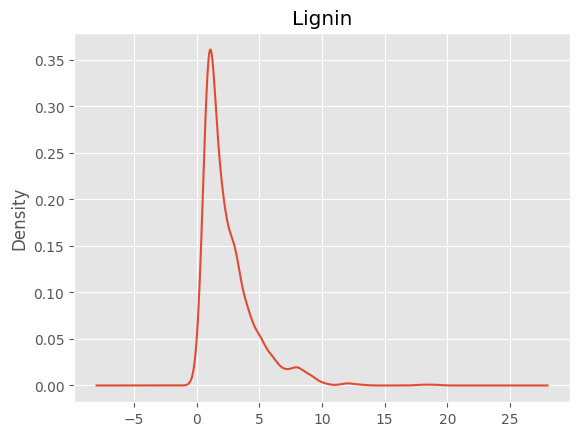

In [47]:
ax = df['Lignin'].value_counts().plot(kind='kde', title='Lignin')

In [48]:
df['Lignin'].describe()

count    2783.000000
mean       15.759792
std         6.779607
min         2.230000
25%        10.355000
50%        14.040000
75%        21.115000
max        32.770000
Name: Lignin, dtype: float64

## NSC

In [49]:
df['NSC'].value_counts()

12.21    22
12.30    20
12.23    19
12.05    17
12.46    17
         ..
24.55     1
21.17     1
23.41     1
12.99     1
23.50     1
Name: NSC, Length: 998, dtype: int64

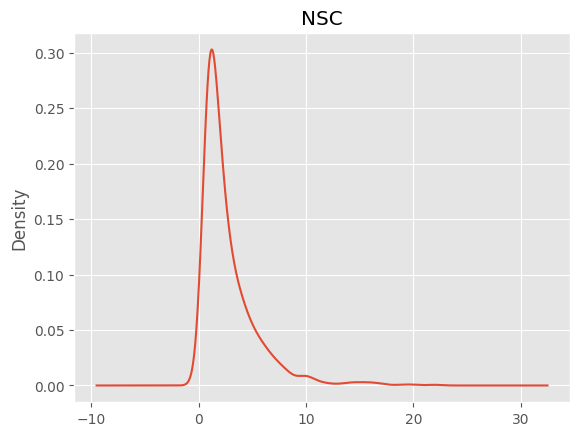

In [50]:
ax = df['NSC'].value_counts().plot(kind='kde', title='NSC')

In [51]:
df['NSC'].describe()

count    2783.000000
mean       14.219641
std         4.298271
min         4.300000
25%        11.605000
50%        12.660000
75%        17.275000
max        29.450000
Name: NSC, dtype: float64

## Alive

In [52]:
df['Alive'].value_counts()

X    491
Name: Alive, dtype: int64

# Features Relationships

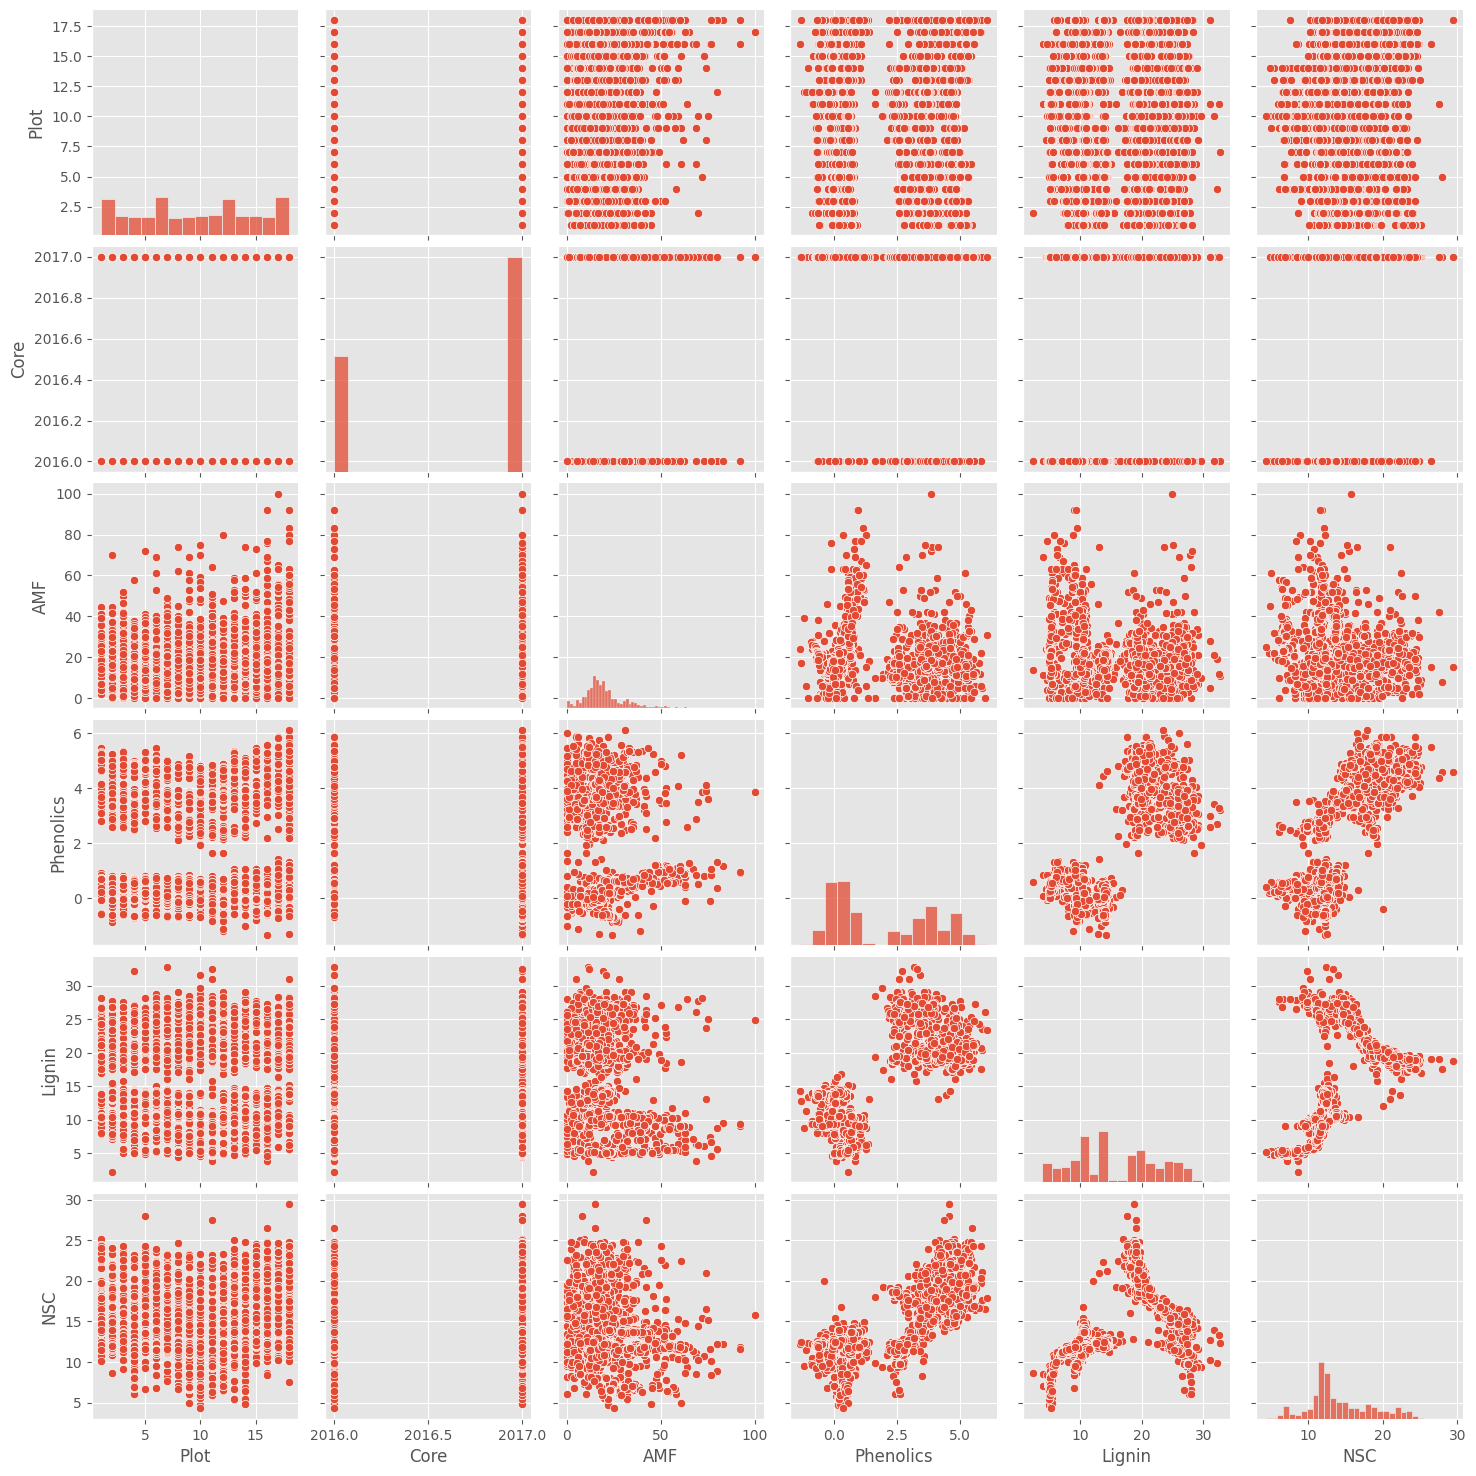

In [53]:
sns.pairplot(df)
plt.show()

<ipython-input-54-73cc3acf3f85>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


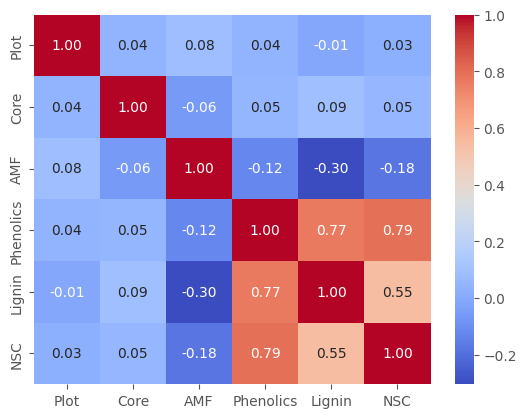

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()
